# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [822]:
# Imports
 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [823]:
# Reading csv to dataframe
df = pd.read_csv('diabetes.csv')

In [824]:
# Looking at first 5 rows of dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [825]:
# Looking at the shape of the dataframe.  768 rows and 9 columns
df.shape

(768, 9)

In [826]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Checking to see if any duplicate rows were removed.  The number of rows is the same, so there were no duplicates.
df.shape

(768, 9)

In [827]:
# Viewing dataset statistics.  Minimum for Glucose, BloodPressure, SkinThickness, Insulin, and BMI is 0, which is not possible for these measurements so we have some missing data.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [828]:
# Checking for null values.  All columns have 768 non-null values so we only have to deal with zeros (since there are 768 rows).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_76513/2762891497.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


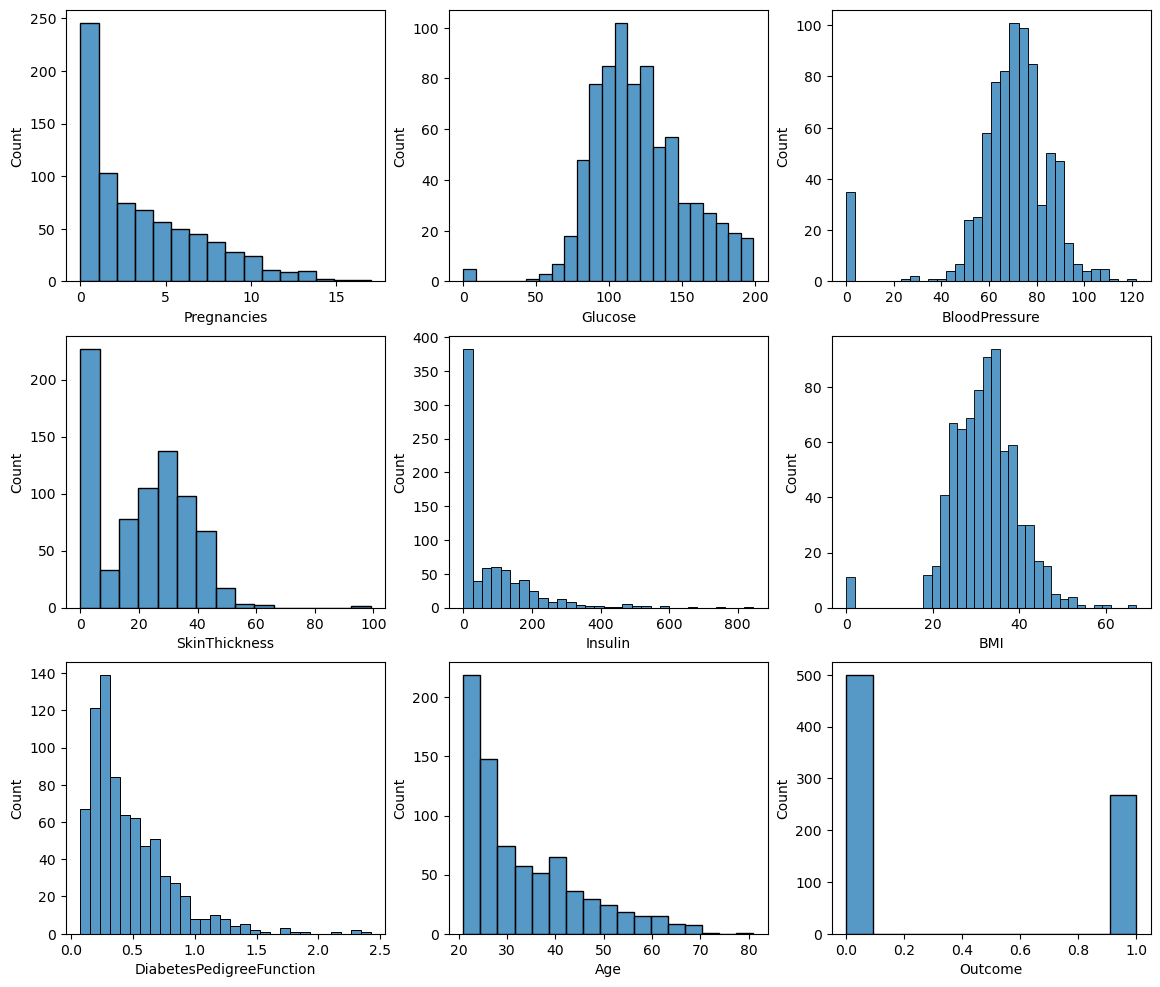

In [829]:
# Plotting histograms of all features

fig, ax = plt.subplots(figsize = (14, 12))
i = 1

for c in df.columns:
    plt.subplot(3,3,i)
    sns.histplot(df[c])
    i += 1

/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_76513/916467800.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


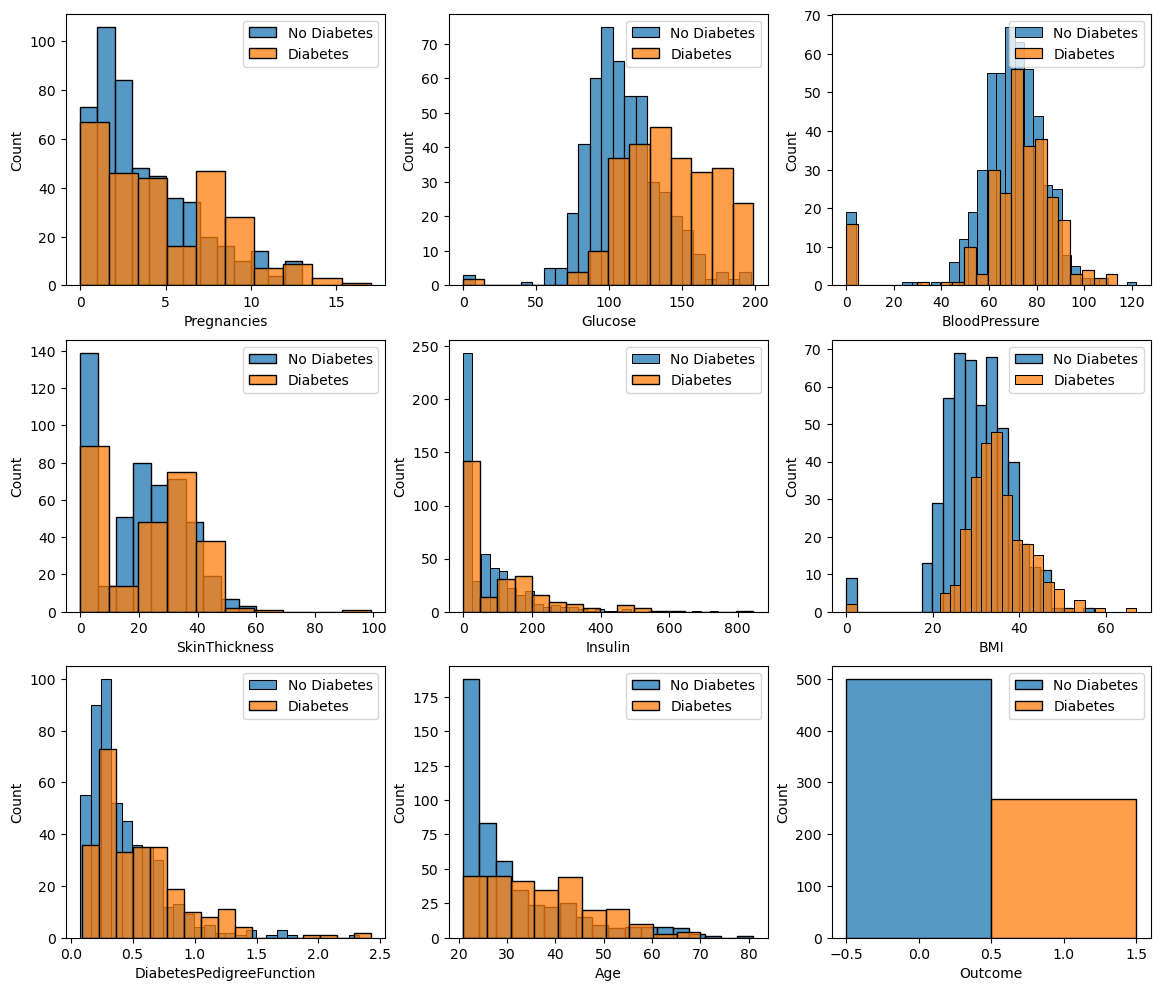

In [830]:
# Plotting how the distribution of the predictor variables differ for individuals with diabetes vs without diabetes.  There is a noticable difference for every variable.

# Creating one dataframe for individuals with diabetes, and another for individuals without
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]

fig, ax = plt.subplots(figsize = (14, 12))
i = 1

for c in df.columns:
    plt.subplot(3,3,i)
    sns.histplot(df_0[c],label='No Diabetes')
    sns.histplot(df_1[c],label='Diabetes')
    plt.legend(loc='upper right')
    i += 1

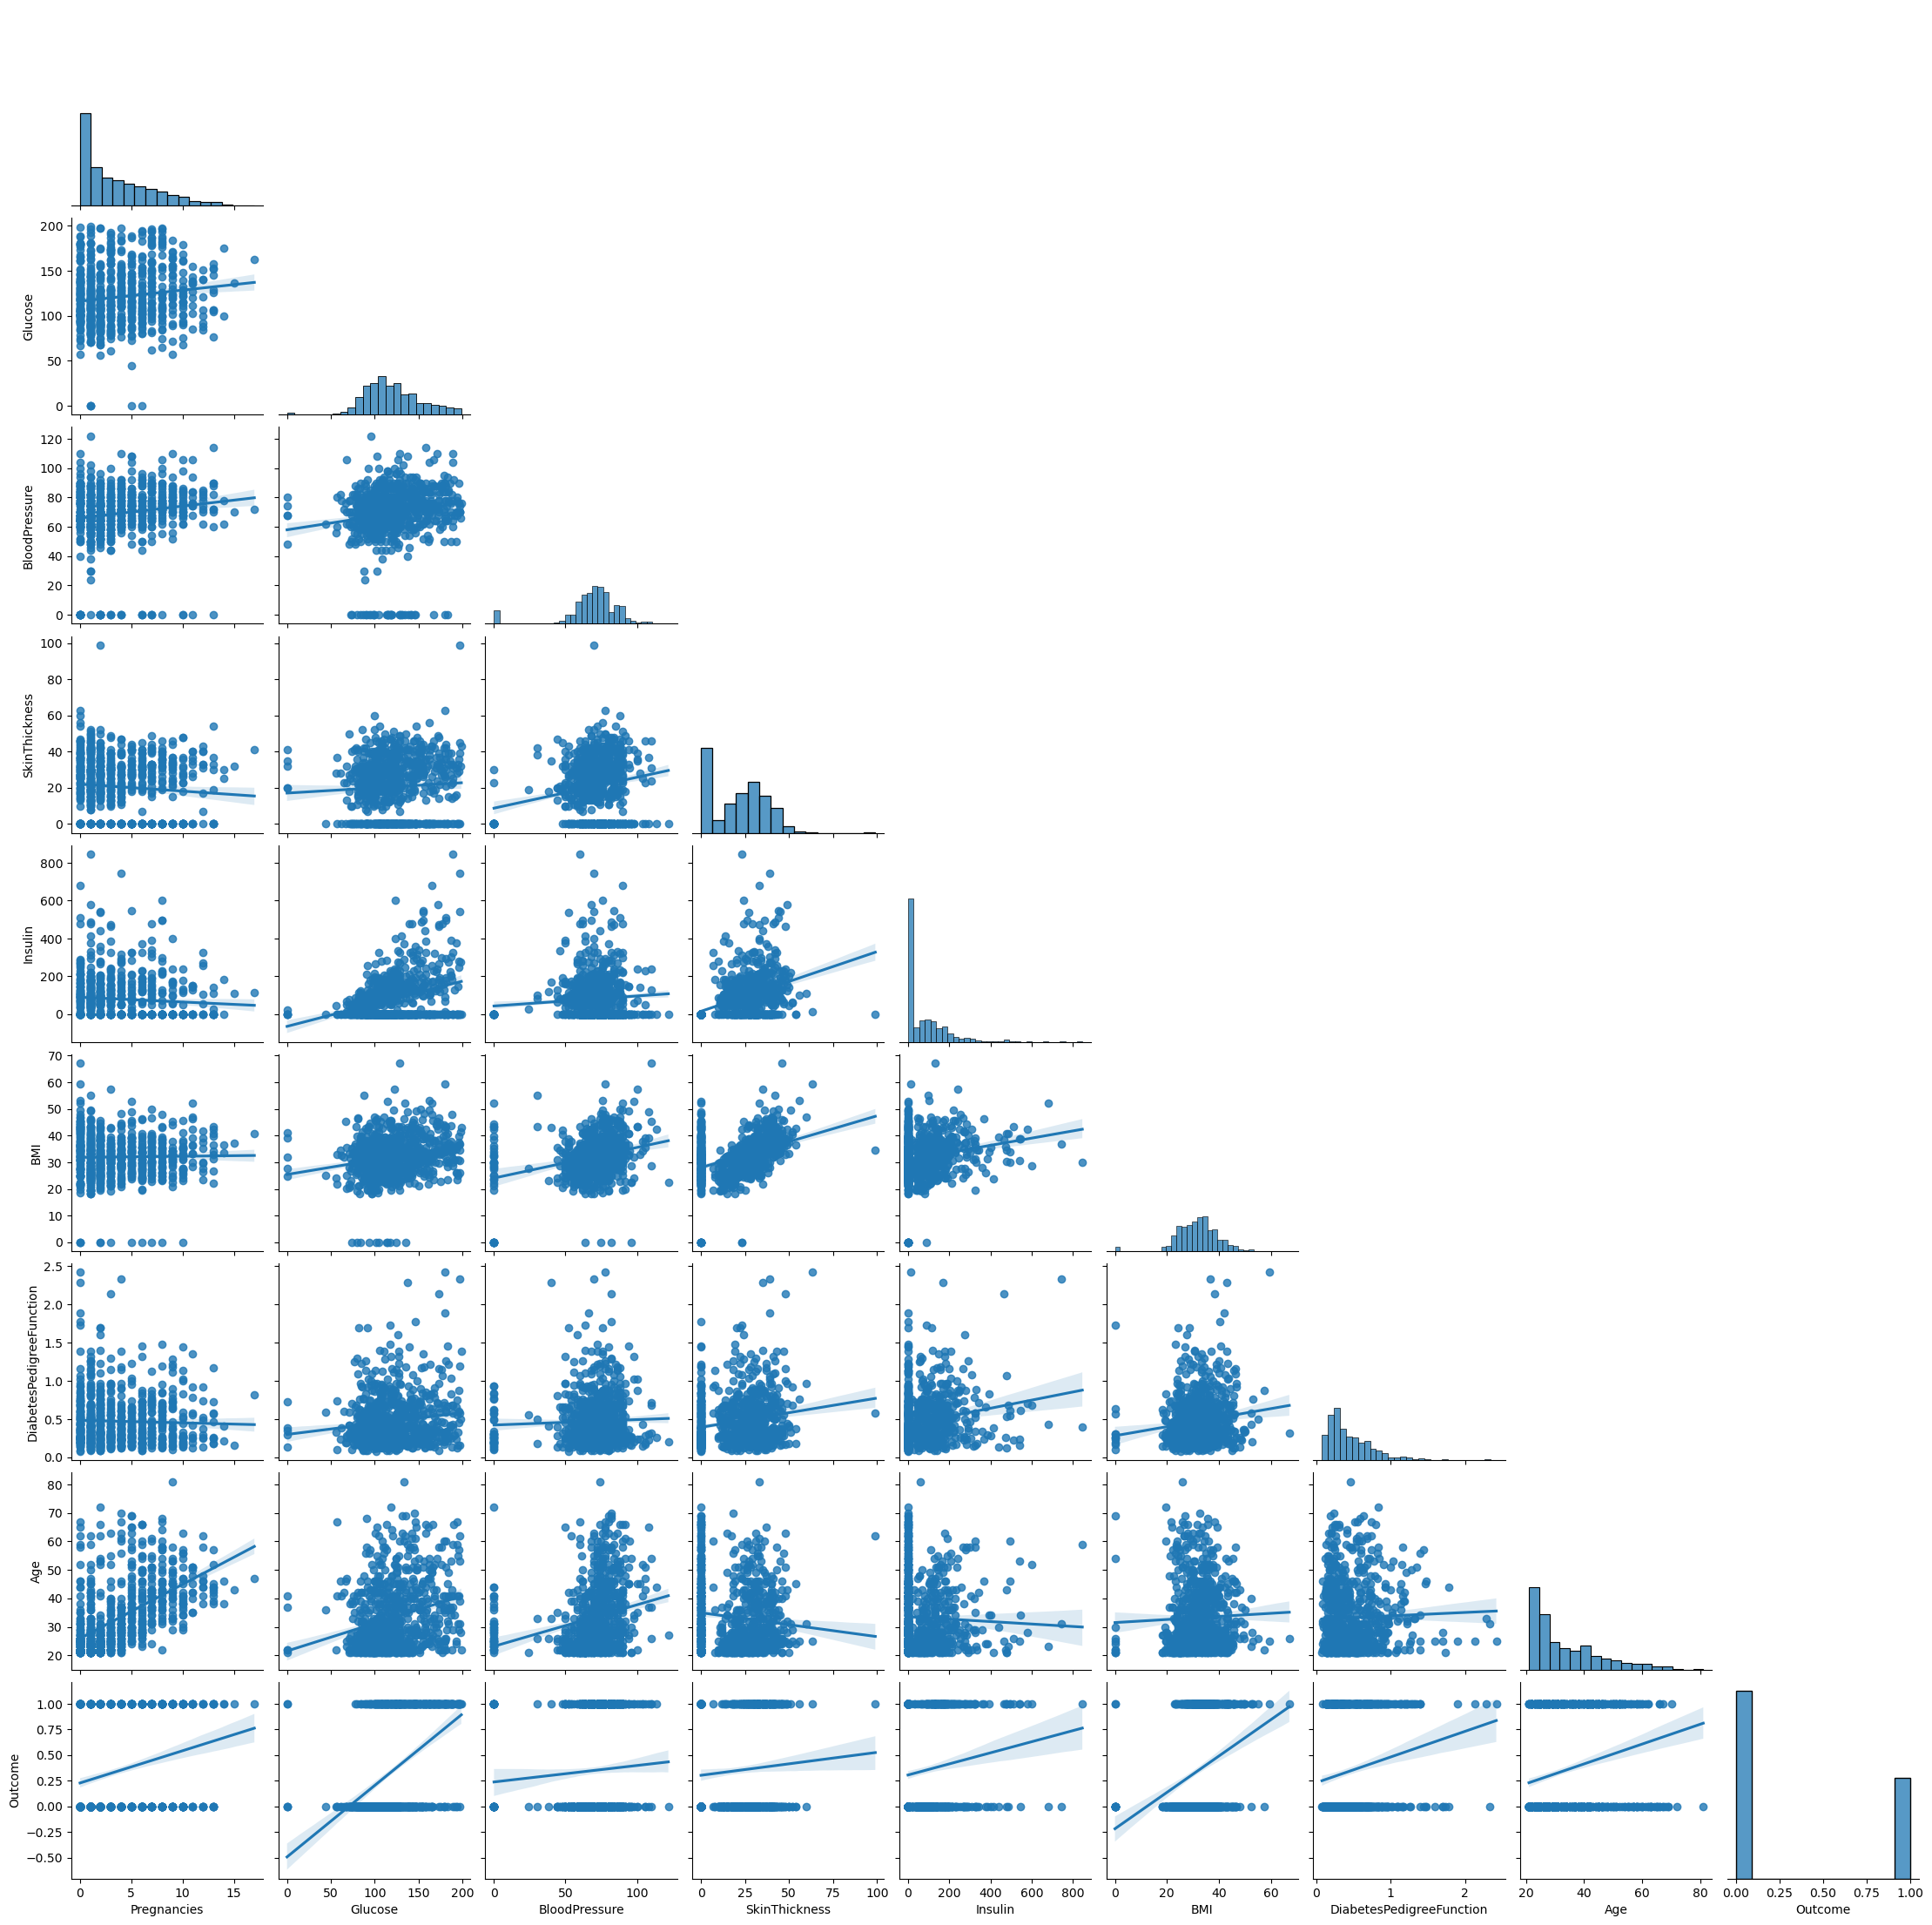

In [831]:
# Using pair plots to visualize the relationship between all variables. Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction, and Age are all noticeably correlated with Outcome.
sns.pairplot(data=df,corner=True,kind='reg')

In [832]:
# Calculating the mean for each variable, for diabetes vs without diabetes.  For those with diabetes, the mean is increased for every variable.

df.pivot_table(index='Outcome',
               values=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
               aggfunc='mean')

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179


/var/folders/t5/t3vd2l292dz2vlb6dq_km0fh0000gn/T/ipykernel_76513/122463141.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


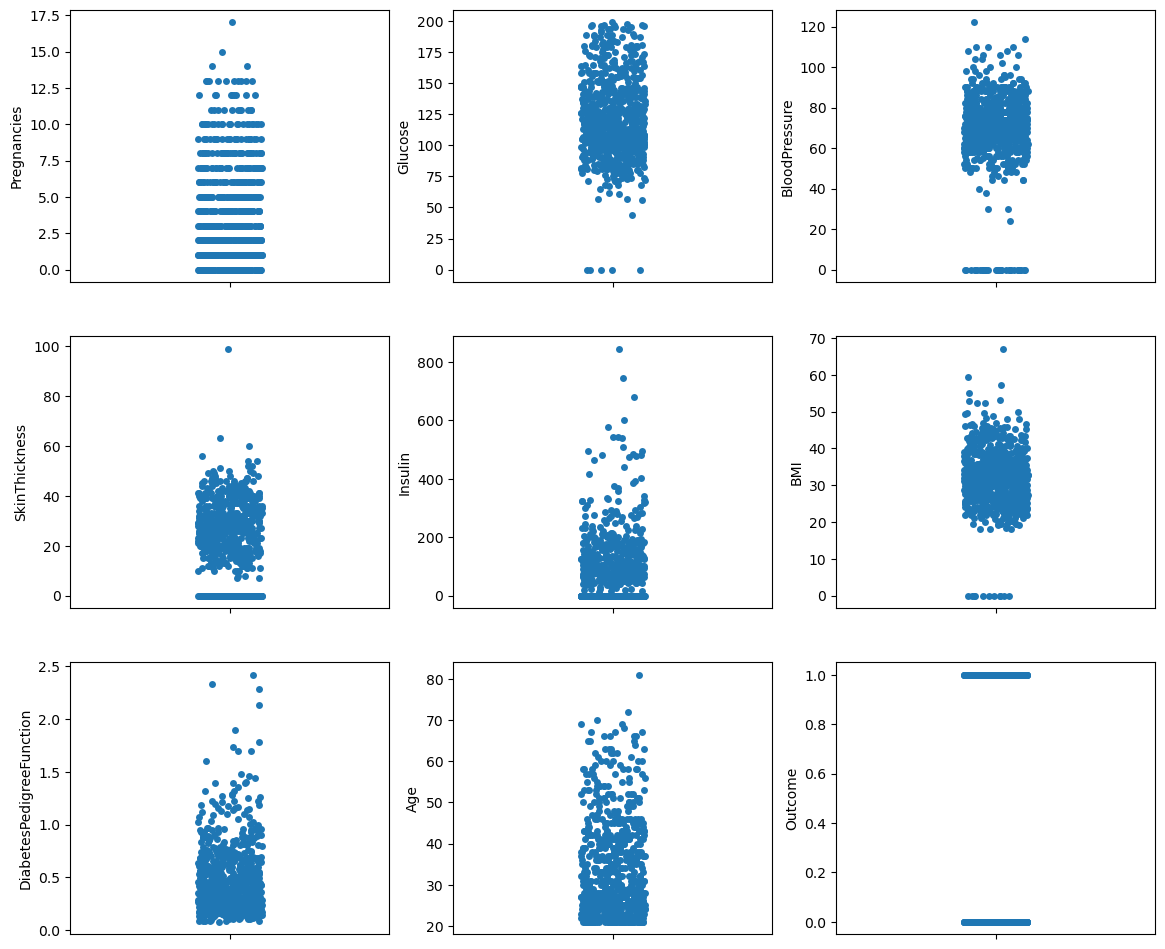

In [833]:
# Using strip plots to easily visualize outliers.  Pregnancies, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age all have at least 1 outlier that is much greater than the rest of the data points.

fig, ax = plt.subplots(figsize = (14, 12))
i = 1

for c in df.columns:
    plt.subplot(3,3,i)
    sns.stripplot(data=df,y=df[c])
    i += 1

In [834]:
# Counting the number of zeros in each column.  As stated earlier, Glucose, BloodPressure, SkinThickness, Insulin, and BMI can't be zero so they will need to be converted before building the models

for i in df.columns:
    print(i, ':', df[i][df[i]==0].count(), 'zeros,', "{:.1%}".format(df[i][df[i]==0].count()/df['Outcome'].count()))

Pregnancies : 111 zeros, 14.5%
Glucose : 5 zeros, 0.7%
BloodPressure : 35 zeros, 4.6%
SkinThickness : 227 zeros, 29.6%
Insulin : 374 zeros, 48.7%
BMI : 11 zeros, 1.4%
DiabetesPedigreeFunction : 0 zeros, 0.0%
Age : 0 zeros, 0.0%
Outcome : 500 zeros, 65.1%


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [835]:
# Checking the balance of 1's to 0's in the Outcome column.  It's 65% 0's and 35% 1's, so the data is not unbalanced.
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [836]:
# Dropping Insulin and SkintThickness columns since there are too many zeros (48.7% and 29.6% respectively)
df = df.drop(['Insulin','SkinThickness'],axis=1)

In [837]:
# Changing zeros to mean for Glucose, BloodPressure, and BMI 

df['Glucose'] = np.where(df['Glucose']==0,df['Glucose'].mean(),df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure']==0,df['BloodPressure'].mean(),df['BloodPressure'])
df['BMI'] = np.where(df['BMI']==0,df['BMI'].mean(),df['BMI'])

In [838]:
# Removing outliers by only including values that are within 3 standard deviations.  Dropped 32 rows.

df_2 = df.copy()

for i in df.columns:
        df_2 = df_2[(df_2[i] > df_2[i].mean() - 3*df_2[i].std()) & 
                (df_2[i] < df_2[i].mean() + 3*df_2[i].std())]

df_2 = df_2.reset_index(drop=True)
df_2.count()

Pregnancies                 736
Glucose                     736
BloodPressure               736
BMI                         736
DiabetesPedigreeFunction    736
Age                         736
Outcome                     736
dtype: int64

In [839]:
# Splitting the data into dependant (y) and independant (X) variables
X = df.drop('Outcome',axis=1)
y = df['Outcome']

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Logistic Regression Model

In [840]:
# Splitting data into train and test sets, using 70/30 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [841]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [843]:
# Training the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

Text(0.5, 1.0, 'Confusion Matrix')

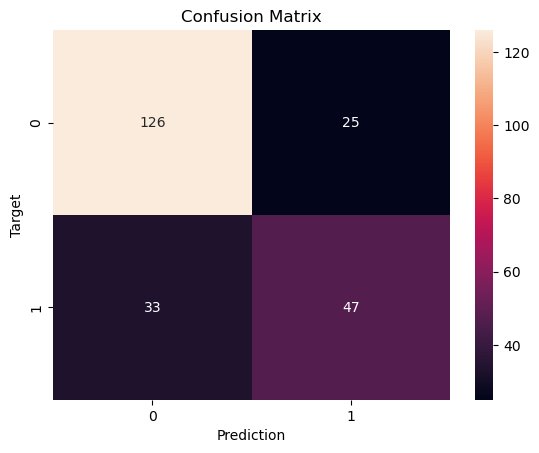

In [844]:
# Confusion matrix to help evaluate the model

cf = confusion_matrix(y_test, y_pred_log)
plt.figure()
sns.heatmap(cf, annot=True, fmt='')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [845]:
# Printing the classification report to evaluate the model
print(classification_report(y_test, y_pred_log))
#print(f1_score(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



## Random Forest Classifier Model

In [846]:
# Splitting data into train and test sets, using 70/30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [847]:
# Training the random foresr classifier model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

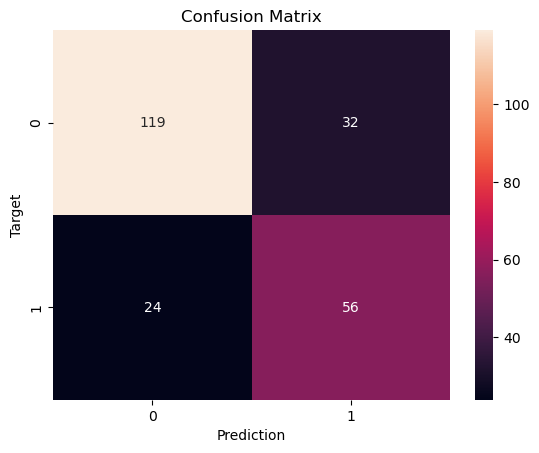

In [848]:
# Confusion matrix to help evaluate the model

cf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cf, annot=True, fmt='')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [849]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       151
           1       0.64      0.70      0.67        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Text(0.5, 1.0, 'ROC Curves')

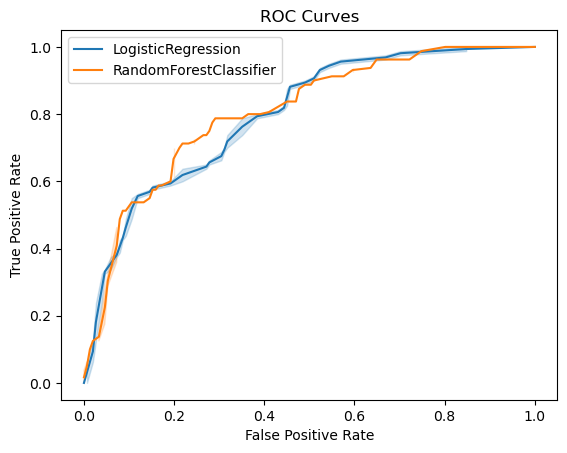

In [850]:
# Plotting the ROC curves for each model and calculating ROC AUC
y_pred_log_proba = logreg.predict_proba(X_test_scaled)[:,1]
y_pred_rf_proba = rf.predict_proba(X_test)[:,1]

ns_fpr_log, ns_tpr_log, threshold_log = roc_curve(y_test, y_pred_log_proba)
ns_fpr_rf, ns_tpr_rf, threshold_rf = roc_curve(y_test, y_pred_rf_proba)

sns.lineplot(x=ns_fpr_log, y=ns_tpr_log, label='LogisticRegression')
sns.lineplot(x=ns_fpr_rf,y=ns_tpr_rf,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

In [851]:
# The ROC curves for the two models are similar, but the RandomForestClassifier looks to be slightly better (closer to the top left corner).  
# This is confirmed by calculating the Area Under Curve (AUC)

log_auc = auc(ns_fpr_log, ns_tpr_log)
rf_auc = auc(ns_fpr_rf, ns_tpr_rf)

print('LogisticRegression AUC:', log_auc)
print('RandomForestClassifier AUC:', rf_auc)

LogisticRegression AUC: 0.7980960264900662
RandomForestClassifier AUC: 0.8050082781456954


In [852]:
# Comparing the Classifiation Reports of both models.  

print('LogisticRegression Classifiation Report:')
print()
print(classification_report(y_test, y_pred_log))

print()
print()

print('RandomForestClassifier Classifiation Report:')
print()

print(classification_report(y_test, y_pred_rf))

LogisticRegression Classifiation Report:

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



RandomForestClassifier Classifiation Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       151
           1       0.64      0.70      0.67        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [853]:
# Looking at the feature importances for the LogisticRegression model using the absolute value of the coefficients

logreg_importance = pd.DataFrame({'Feature': X.columns,
                                  'Coefficient': sum(logreg.coef_.tolist(),[]),
                                  'Absolute Coef': np.abs(sum(logreg.coef_.tolist(),[]))}).sort_values('Absolute Coef',ascending=False).reset_index(drop=True)

logreg_importance['Importance Rank'] = logreg_importance['Absolute Coef'].rank(ascending=False)

logreg_importance

,Feature,Coefficient,Absolute Coef,Importance Rank
0,Glucose,1.158306,1.158306,1.0
1,BMI,0.757252,0.757252,2.0
2,Age,0.386545,0.386545,3.0
3,Pregnancies,0.198387,0.198387,4.0
4,DiabetesPedigreeFunction,0.111745,0.111745,5.0
5,BloodPressure,-0.107364,0.107364,6.0


In [854]:
# Looking at the feature importances for the RandomForestClassifier model

rf_importance = pd.DataFrame({'Feature': X.columns,
              'Importance': rf.feature_importances_.tolist()}).sort_values('Importance',ascending=False)

rf_importance['Importance Rank'] = rf_importance['Importance'].rank(ascending=False)

rf_importance

,Feature,Importance,Importance Rank
1,Glucose,0.320772,1.0
3,BMI,0.196453,2.0
5,Age,0.167552,3.0
4,DiabetesPedigreeFunction,0.132616,4.0
2,BloodPressure,0.097781,5.0
0,Pregnancies,0.084827,6.0


In [855]:
importance_compare = logreg_importance[['Feature','Importance Rank']].merge(rf_importance[['Feature','Importance Rank']],
                                                                            on='Feature',
                                                                            how='left')

importance_compare.columns = ['Feature','LogisticRegression Importance','RandomForestClassifier Importance']
importance_compare

,Feature,LogisticRegression Importance,RandomForestClassifier Importance
0,Glucose,1.0,1.0
1,BMI,2.0,2.0
2,Age,3.0,3.0
3,Pregnancies,4.0,6.0
4,DiabetesPedigreeFunction,5.0,4.0
5,BloodPressure,6.0,5.0


In [856]:
# Conclusions

"""
1. The RandomForestClassifier performs better than the LogisticRegression in most metrics.  It scores higher in ROC area under curve, all f1 metrics except for the negative f1-score (it's tied), 
and has higher precision on negative's and recall on positives.  The LogisticRegression model has higher precision on positives and higher recall on negatives.

2. The most important features for both models are Glucose, BMI, and Age.  The order of importance for the features of both models is almost the same, with Blood Pressure moving from 6th to 4th 
when going from the LogisticRegression to RandomForestClassifier model.

3. Insulin level would have likely been a very important feature for both models if it was included.  A future test could be to drop all rows where Insulin is zero, and try building the same models
to see if they performed better.

4. Between the two models, the RandomForestClassifier should be chosen for predicting diabetes.  Not only does it perform slightly better in almost every metric, it also performs much better in a 
very important metric when diagnosing diseases: True Positive Rate.  By improving the True Positive Rate, you increase the number of patients with diabetes who will be diagnosed properly and treated.

"""

"\n1. The RandomForestClassifier performs better than the LogisticRegression in most metrics.  It scores higher in ROC area under curve, all f1 metrics except for the negative f1-score (it's tied), \nand has higher precision on negative's and recall on positives.  The LogisticRegression model has higher precision on positives and higher recall on negatives.\n\n2. The most important features for both models are Glucose, BMI, and Age.  The order of importance for the features of both models is almost the same, with Blood Pressure moving from 6th to 4th \nwhen going from the LogisticRegression to RandomForestClassifier model.\n\n3. Insulin level would have likely been a very important feature for both models if it was included.  A future test could be to drop all rows where Insulin is zero, and try building the same models\nto see if they performed better.\n\n4. Between the two models, the RandomForestClassifier should be chosen for predicting diabetes.  Not only does it perform slightly 